**Game Name: ColorCrafters: Graph Coloring Challenge**

**Explanation:**


*   ColorCrafters is an interactive puzzle game where players act as graph
colorists, coloring nodes of a graph without violating constraints.
*   It simulates the classic graph coloring problem in computer science, where no two adjacent nodes can share the same color.

*   The game incorporates heuristic strategies like Minimum Remaining Values (MRV) and Degree Heuristic, making it an educational and engaging problem-solving experience.






  

**Task Description:**



*   In ColorCrafters, players color nodes in a randomly generated graph using a limited palette, ensuring adjacent nodes don’t share the same color.
*   The game prioritizes nodes using heuristic strategies: the MRV heuristic selects nodes with the fewest color options, while the Degree Heuristic focuses on nodes with the most connections.

*   This approach helps players understand graph coloring algorithms, with visualizations to show the results in real-time.





**Game Features:**



*  **Custom Graph Creation:** Players define the number of nodes, edges, and colors, generating a unique graph with random edges each time.

*   **Heuristic Node Coloring:** The game uses two strategies:

1.   *Minimum Remaining Values (MRV):* Colors the node with the fewest available options.
2.   *Degree Heuristic:* Prioritizes nodes with the most connections.




*   **Automated Coloring Algorithm:** Automatically assigns colors based on selected strategies, displaying node and color assignments during the process.
*   **Game Summary:** Displays final color assignments for easy verification.


*   **User Interaction:** Players customize the graph parameters, making each session unique.




*ColorCrafters offers a hands-on approach to understanding graph theory and coloring heuristics through interactive gameplay and visual feedback.*



Enter the number of nodes: 4
Enter the number of edges: 5
Enter the number of colors: 3
Generating random edges...
Initial Graph:
Colored node 2 with color 0
Colored node 0 with color 1
Colored node 1 with color 2
Colored node 3 with color 1
Graph Nodes and Colors:
Node 0: 1
Node 1: 2
Node 2: 0
Node 3: 1


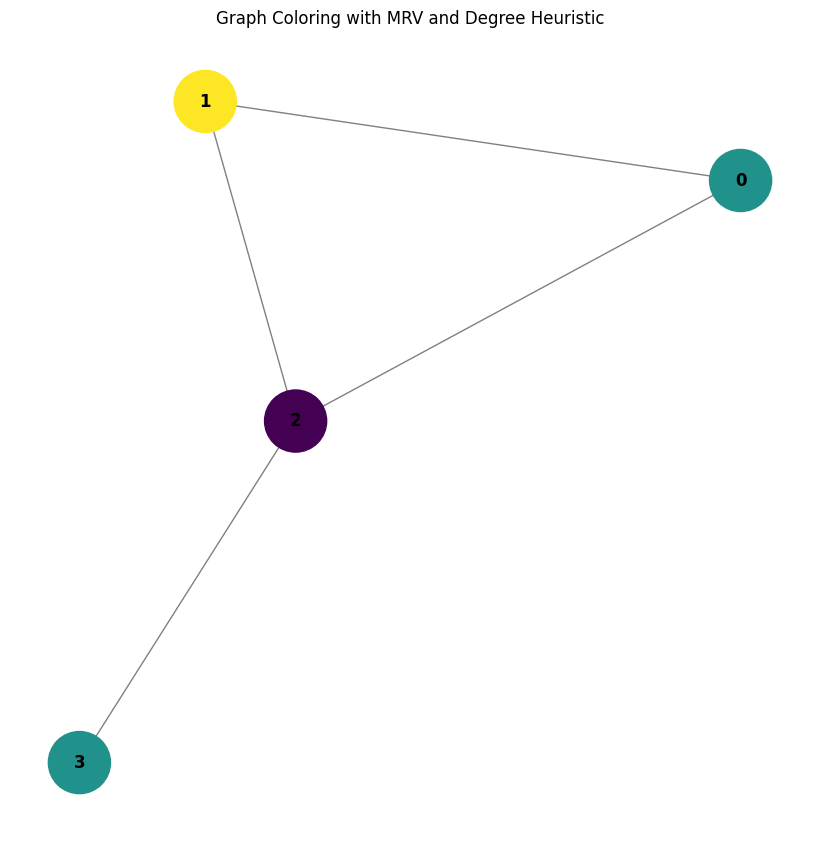

In [3]:
import random
import matplotlib.pyplot as plt
import networkx as nx

class GraphColoring:
    def __init__(self, num_nodes, edges, num_colors=3):
        self.graph = nx.Graph()  # Create a graph object
        self.graph.add_nodes_from(range(num_nodes))  # Add nodes to the graph
        self.graph.add_edges_from(edges)  # Add edges to the graph
        self.colors = {}  # Dictionary to hold colors of nodes
        self.num_colors = num_colors  # Number of colors to use

    def get_mrv_node(self):
        """Get the node with the minimum remaining values (MRV)."""
        mrv_node = None
        min_remaining_values = float('inf')

        for node in self.graph.nodes():
            if node not in self.colors:
                remaining_values = self.get_remaining_color_options(node)
                if remaining_values < min_remaining_values:
                    min_remaining_values = remaining_values
                    mrv_node = node

        return mrv_node

    def get_remaining_color_options(self, node):
        """Count the remaining color options for a given node."""
        neighbors = list(self.graph.neighbors(node))
        used_colors = {self.colors.get(neighbor) for neighbor in neighbors if neighbor in self.colors}
        return self.num_colors - len(used_colors)

    def get_degree_node(self):
        """Get the node with the highest degree (Degree Heuristic)."""
        degree_node = None
        max_degree = -1

        for node in self.graph.nodes():
            if node not in self.colors:
                degree = self.graph.degree(node)
                if degree > max_degree:
                    max_degree = degree
                    degree_node = node

        return degree_node

    def color_graph(self):
        """Color the graph using MRV and Degree Heuristic."""
        while len(self.colors) < self.graph.number_of_nodes():
            # Choose the next node to color using MRV first, then Degree Heuristic
            node = self.get_mrv_node() or self.get_degree_node()
            if node is None:  # No more nodes to color
                break

            # Assign the first available color
            available_colors = set(range(self.num_colors))
            neighbors = list(self.graph.neighbors(node))
            used_colors = {self.colors.get(neighbor) for neighbor in neighbors if neighbor in self.colors}

            for color in available_colors:
                if color not in used_colors:
                    self.colors[node] = color
                    print(f"Colored node {node} with color {color}")
                    break

    def visualize_colored_graph(self):
        """Visualize the colored graph."""
        plt.figure(figsize=(8, 8))
        color_map = [self.colors.get(node, 'lightgray') for node in self.graph.nodes()]
        nx.draw(self.graph, with_labels=True, node_size=2000, node_color=color_map, font_size=12, font_weight='bold', edge_color='gray')
        plt.title("Graph Coloring with MRV and Degree Heuristic")
        plt.show()

    def print_graph(self):
        """Print the current state of the graph and assigned colors."""
        print("Graph Nodes and Colors:")
        for node in self.graph.nodes():
            color = self.colors.get(node, 'Not Colored')
            print(f"Node {node}: {color}")

def generate_random_edges(num_nodes, num_edges):
    """Generate random edges for a graph."""
    edges = set()
    while len(edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:
            edges.add((u, v))
    return list(edges)

def get_user_input():
    """Get user input for the number of nodes, edges, and colors."""
    while True:
        try:
            num_nodes = int(input("Enter the number of nodes: "))
            num_edges = int(input("Enter the number of edges: "))
            num_colors = int(input("Enter the number of colors: "))
            if num_edges > num_nodes * (num_nodes - 1) // 2:
                print("Too many edges for the number of nodes. Please enter valid numbers.")
                continue
            return num_nodes, num_edges, num_colors
        except ValueError:
            print("Invalid input. Please enter integers.")

# Main program
if __name__ == "__main__":
    num_nodes, num_edges, num_colors = get_user_input()

    print("Generating random edges...")
    edges = generate_random_edges(num_nodes, num_edges)

    graph_coloring = GraphColoring(num_nodes, edges, num_colors)

    print("Initial Graph:")
    graph_coloring.color_graph()  # Perform graph coloring
    graph_coloring.print_graph()  # Print the current state of the graph
    graph_coloring.visualize_colored_graph()  # Visualize the result